In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import Hofstader as hof
import sympy as sp

reload(hof) 

<module 'Hofstader' from '/Users/gordonwongyl/Documents/FYP/Numerical/Hofstader.py'>

In [2]:
# Generate set of fractions between 0 and 1
from fractions import Fraction
frac_set = set()
for i in range(1,100):
    for j in range(1,100):
            frac_set.add(Fraction(i,j))
len(frac_set)

6007

In [ ]:
# Diagonalization routine
N = 100
a, t = 1, 1
for frac in frac_set:
    p, q = frac.numerator, frac.denominator
    hof.diagonalize(p, q, N, N, a, t, file="Butterfly")

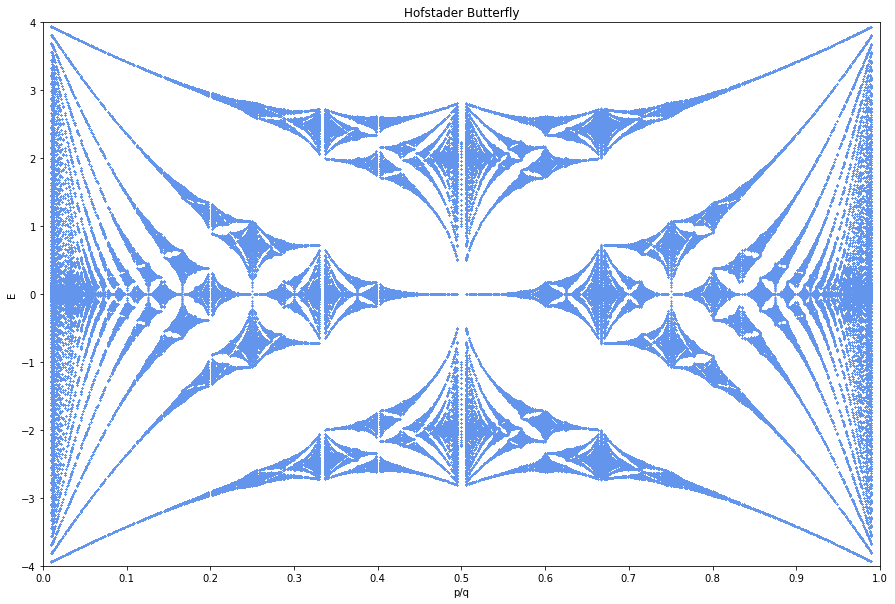

: 

In [ ]:
# Plot spectrum (0.01 - 1)
# plt.figure(figsize=(15,10), facecolor='white')
plt.figure(figsize=(15,10))
plt.ylim(-4,4)
plt.xlabel('p/q')
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,.1))
plt.ylabel('E')
plt.title("Hofstader Butterfly")
for frac in frac_set:
    p, q = frac.numerator, frac.denominator
    try: 
        eigvals = np.load(f"Butterfly/100_by_100_p_{p}_q_{q}_eigenvalues.npy")
        spectrum = eigvals.flatten().real
        plt.scatter(np.ones(len(spectrum))*p/q , spectrum[:], label=f"{p}/{q}", s=0.1, color='cornflowerblue')
    except:
        continue


In [ ]:
# Fraction set for low B regime
frac_set2 = set()
for i in range(1,100):
    frac_set2.add(Fraction(i,2000))

In [ ]:
# Compute spectrum for (kx,ky) = (0,0)
spectrum_dict = dict()
for frac in frac_set2:
    p, q = frac.numerator, frac.denominator
    print(p,q)
    eigval = np.linalg.eigvals(hof.Hamiltonian_k(0,0,1,p,q))
    idx = eigval.argsort()
    eigval = eigval[idx]
    np.save(f"Low_B_spectrum/{p}_{q}_spectrum", eigval.flatten().real)

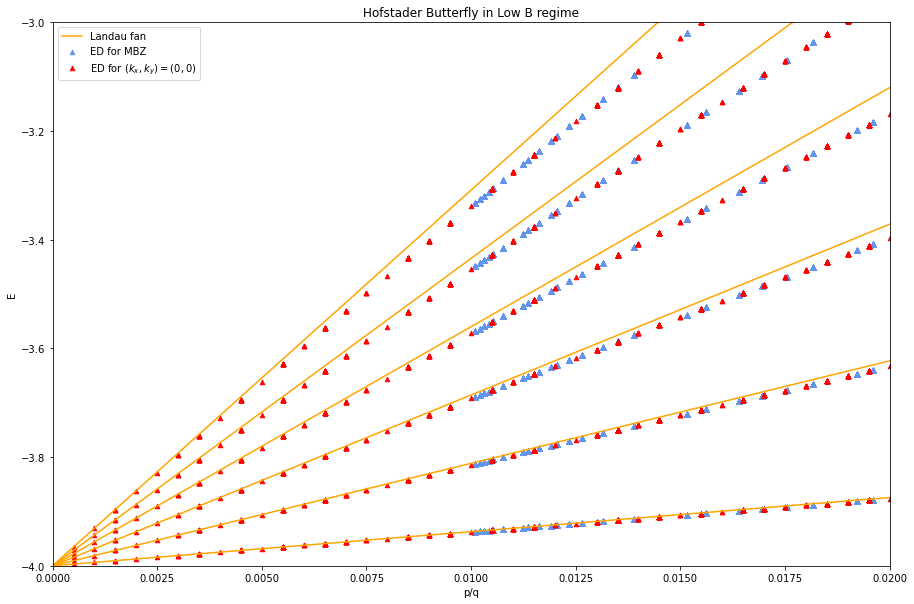

In [ ]:
# Plot spectrum for small p/q < 0.01
plt.figure(figsize=(15,10), facecolor='white')
plt.ylim(-4,-3)
plt.xlabel('p/q')
plt.xlim(0,.02)
# plt.xticks(np.arange(0,.01,.01))
plt.ylabel('E')
plt.title("Hofstader Butterfly in Low B regime")

# Spectrum from ED of MBZ
n_max = 5
for frac in frac_set:
    p, q = frac.numerator, frac.denominator
    try: 
        eigvals = np.load(f"Butterfly/100_by_100_p_{p}_q_{q}_eigenvalues.npy")
        spectrum = eigvals.flatten().real
        filtered_idx = np.where(spectrum< -4 + p/q*4*np.pi*(n_max+0.5))
        spectrum = spectrum[filtered_idx]
        if p == 1 and q == 2:
            plt.scatter(np.ones(len(spectrum))*p/q , spectrum[:], color='cornflowerblue', marker="^", s=20, label='ED for MBZ')
        else:
            plt.scatter(np.ones(len(spectrum))*p/q , spectrum[:], color='cornflowerblue', marker="^", s=20)
    except:
        continue

# Specturm from partial ED
for frac in frac_set2:
    p, q = frac.numerator, frac.denominator
    spectrum = np.load(f"Low_B_spectrum/{p}_{q}_spectrum.npy")
    # filter
    filtered_idx = np.where(spectrum< -4 + p/q*4*np.pi*(n_max+0.5))
    spectrum = spectrum[filtered_idx]
    if p == 1 and q== 100:
        plt.scatter(np.ones(len(spectrum))*p/q , spectrum, color='red', marker="^", s=20, label='ED for $(k_x, k_y) = (0,0)$')
    else:
        plt.scatter(np.ones(len(spectrum))*p/q , spectrum, color='red', marker="^", s=20)

# Landau fan plot
x_axis = np.arange(0, 0.2, 0.01)
for n in range(n_max+1):
    if n==0:
        plt.plot(x_axis, -4 + x_axis*4*np.pi*(n+0.5), color='orange', label='Landau fan')
    else:
        plt.plot(x_axis, -4 + x_axis*4*np.pi*(n+0.5), color='orange')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# Generate fraction for low B regime
from fractions import Fraction
frac_set3=set()
for n in range(3, 21, 1):
            frac_set3.add(Fraction(1,n))

# Diagonalization routine
N = 100
a, t = 1, 1
inputs = [(frac.numerator,frac.denominator, N*frac.denominator, N*frac.denominator, a, t, "Low_B_regime") for frac in frac_set3]


from multiprocessing import Pool
with Pool() as p:
    p.map(hof.diagonlaize_pool, inputs)
